## Week 14 Lecture 2

We have been studying logistic regression for classification into categories. We want to explore three components of logistic regression 

- minimizing the logistic loss function 
- metrics for evaluating the model 
- varying the decision boundary to separate the categories

These components will give us more practice with classification.

In [11]:
# import packages 

import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

from helper_functions import *

# change settings

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 8)

%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['font.size'] = 16

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

#### Gradient Descent

Remember that the sigmoid function inputs a number and outputs a number between 0 and 1. 

In [12]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))

While the output can get close to 0 or 1, the output of the sigmoid function never equals 0 or 1. So we might have a situation were we cannot find slope and intercept that minimizes the average square loss. 

In [13]:
example = pd.DataFrame({
    'X': [-5, -4, -3, -2, -1, 1, 2, 3, 4, 5],
    'Y': [ 0,  0,  0,  0,  0, 1, 1, 1, 1, 1]
})

Here we have a dataset consisting of ten points. Note that we can separate these points between positive values and negative values

$$ 
\hat{y} =
\begin{cases}
1 & \text{if } x \geq 0 \\
0 & \text{if } x < 0 \\
\end{cases}
$$

So the decision boundary is the number 0. 

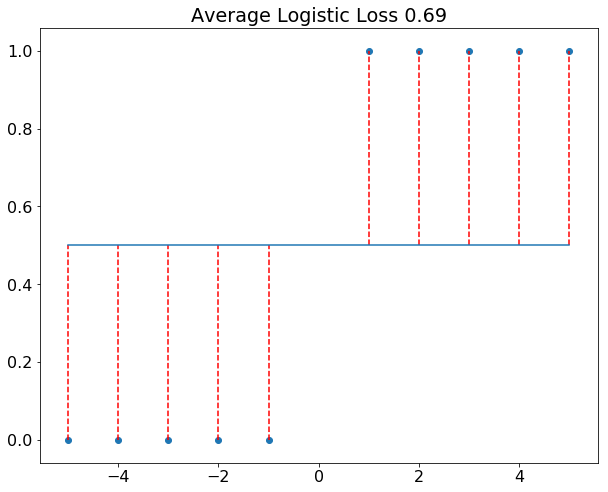

In [14]:
regression_widget(example)

Since the sigmoid function never equals 0 or 1, if we increase the slope, then we can get lower average logistic loss.

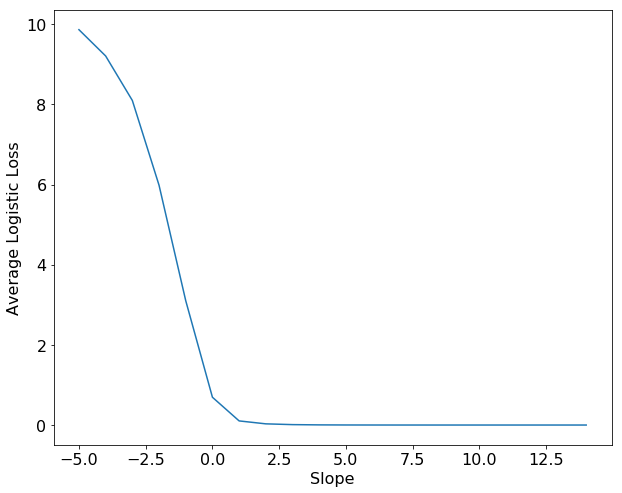

In [15]:
slopes = np.arange(-5,15,1)
data = example
explanatory_variable = "X" 
response_variable = "Y"

loss_values = [average_logistic_loss(slope, data, explanatory_variable, response_variable) for slope in slopes]

plt.plot(slopes, loss_values)
plt.xlabel("Slope")
plt.ylabel("Average Logistic Loss");

So we should add regularization. We can modify logistic regression in the same way we modified linear regression into ridge regression. Remember that the model takes the form

$$
\hat{y} = \sigma(a + b \cdot x) 
$$

where $a$ is the intercept and $b$ is the slope. So for dataset with explanatory variables $\{x_1,\ldots,x_n\}$ and $\{y_1,\ldots,y_n\}$ we have the average loss

$$
L(a,b; x_1,\ldots,x_n, y_1,\ldots,y_n) = \frac{1}{n} \sum_{i=1}^n - y_i \operatorname{log}\left(\hat{y_i}\right) - \left(1 - y_i\right) \operatorname{log}\left( 1 -\hat{y_i}\right)
$$

We can add regularization through another term that measures the size of the slope and intercept. 

$$
L(a,b; x_1,\ldots,x_n, y_1,\ldots,y_n) = \lambda \left(a^2 + b^2\right) + \frac{1}{n} \sum_{i=1}^n - y_i \operatorname{log}\left(\hat{y_i}\right) - \left(1 - y_i\right) \operatorname{log}\left( 1 -\hat{y_i}\right)
$$


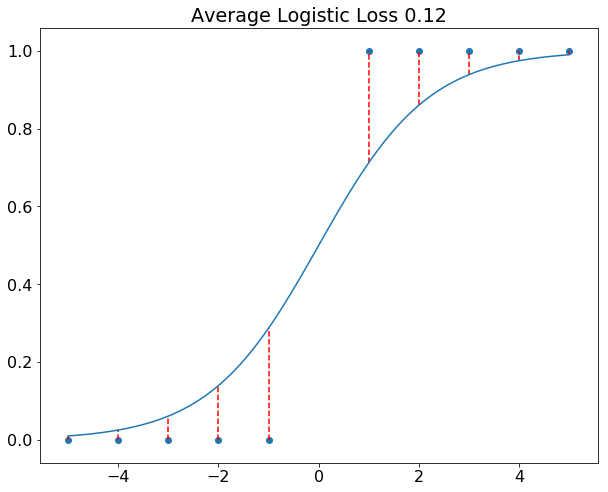

In [16]:
regularization_widget(example)

#### Evaluating Classifications

We have been comparing observations and predictions through accuracy. However we should try to understand different types of errors. We can use metrics to evaluate the models. 

In [17]:
two_categories = pd.read_csv("two_categories.csv")
two_categories

,Feature 1,Feature 2,Category
0,10.38,17.99,1
1,17.77,20.57,1
2,21.25,19.69,1
3,20.38,11.42,1
4,14.34,20.29,1
...,...,...,...
564,22.39,21.56,1
565,28.25,20.13,1
566,28.08,16.60,1
567,29.33,20.60,1


We can plot the values of the two features with a color to denote the category.

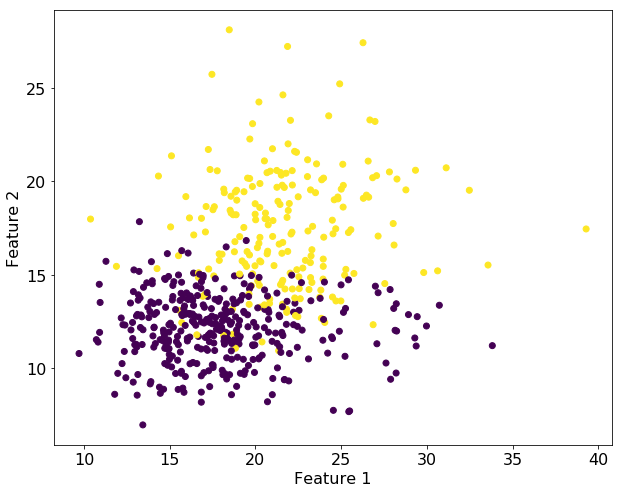

In [18]:
plt.scatter(two_categories["Feature 1"], two_categories["Feature 2"], c = two_categories["Category"])
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

We can split at random into a training set and testing set.

In [32]:
two_categories_shuffled = two_categories.sample(frac = 1, replace= False, random_state=42)

number_records_training_set = int(0.8 * len(two_categories))

training_set = two_categories_shuffled.iloc[:number_records_training_set,:] 
testing_set = two_categories_shuffled.iloc[number_records_training_set:,:] 

print("Training Data Size: ", len(training_set))
print("Test Data Size: ", len(testing_set))

Training Data Size:  455
Test Data Size:  114


We can use logistic regression to determine predictions for the testing set.

In [33]:
model = LogisticRegression()
model.fit(training_set[["Feature 1", "Feature 2"]], training_set["Category"])
yhat_classification = model.predict(testing_set[["Feature 1", "Feature 2"]])

We have two possible values for the response variable either 0 and 1. We have two possible values for the guesses either 0 or 1. So we have four possibilities. 

- True Positive : Observation = 1 and Prediction = 1
- False Positive : Observation = 0 and Prediction = 1
- True Negative : Observation = 0 and Prediction = 0
- False Negative : Observation = 1 and Prediction = 0

We can calculate these four possibilities

In [34]:
observed =  testing_set["Category"]
predicted = yhat_classification 

tp = sum((observed == predicted) & (observed == 1))
tn = sum((observed == predicted) & (observed == 0))
fp = sum((observed != predicted) & (observed == 0))
fn = sum((observed != predicted) & (observed == 1))

We can plot these four possibilities in a confusion matrix.

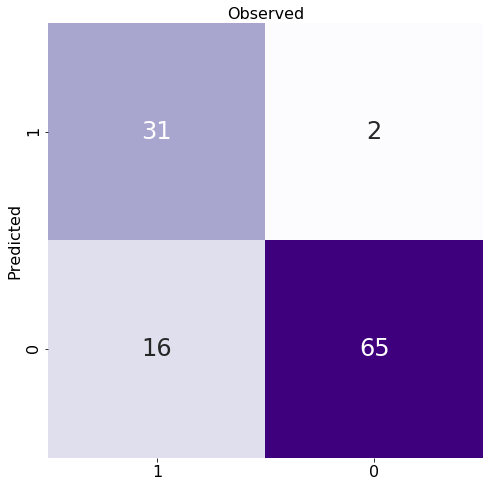

In [35]:
confusion_matrix = np.array([
    [tp, fp],
    [fn, tn],
])
    
plot_confusion(confusion_matrix)

We learn that we have 

- 31 True Positive's 
- 2 False Positive's 
- 65 True Negative's
- 16 False Negative's

on the testing set for the logistic regression model with two features.

In [36]:
def accuracy(observed, predicted):
    return np.mean(observed == predicted)

accuracy(observed, predicted)

0.8421052631578947

In addition to the accuracy, we have precision and recall. 

In [37]:
def precision(observed, predicted):    
    tp = sum((observed == predicted) & (observed == 1))
    fp = sum((observed != predicted) & (observed == 0))
   
    return tp / (tp + fp)

precision(observed, predicted)

0.9393939393939394

Precision measures the number of true postives amongst predictions of 1.

In [38]:
def recall(observed, predicted):
    tp = sum((observed == predicted) & (observed == 1))
    fn = sum((observed != predicted) & (observed == 1))

    return tp / (tp + fn)

recall(observed, predicted)

0.6595744680851063

Remember that we took the threshold to be 0.5. If we adjust the threshold then we obtain different values for accuracy, precision and recall.

In [39]:
accuracies = []
precisions = []
recalls = []
thresholds = np.arange(0.1, 0.9, 0.1)

yhat = model.predict_proba(testing_set[["Feature 1", "Feature 2"]])

for threshold in thresholds:
    predicted = np.where(threshold <= yhat[:,1], 1, 0)

    acc = accuracy(observed, predicted)
    pre = precision(observed, predicted)
    rec = recall(observed, predicted)

    accuracies.append(acc)
    precisions.append(pre)
    recalls.append(rec)
    
    print("threshold p >= {}: accuracy {}, precision {}, recall {}".format(np.round(threshold,2), 
                                                                           np.round(acc, 2),
                                                                           np.round(pre, 2),
                                                                           np.round(rec, 2)))

threshold p >= 0.1: accuracy 0.51, precision 0.46, recall 1.0
threshold p >= 0.2: accuracy 0.75, precision 0.63, recall 0.98
threshold p >= 0.3: accuracy 0.82, precision 0.73, recall 0.87
threshold p >= 0.4: accuracy 0.87, precision 0.86, recall 0.81
threshold p >= 0.5: accuracy 0.84, precision 0.94, recall 0.66
threshold p >= 0.6: accuracy 0.82, precision 0.97, recall 0.6
threshold p >= 0.7: accuracy 0.81, precision 0.96, recall 0.55
threshold p >= 0.8: accuracy 0.77, precision 1.0, recall 0.45


We can plot the values in a precision-recall curve.

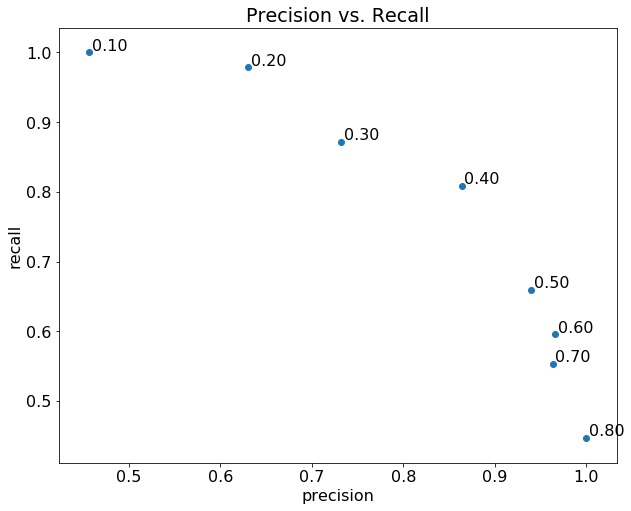

In [40]:
plt.scatter(precisions, recalls)

for thresh, prec, rec in zip(thresholds, precisions, recalls):
    plt.text(prec + 0.003, rec + 0.003, f"{thresh:0.2f}")

plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision vs. Recall');

Remember that 

- precision penalizes false positives
- recall penalizes false negatives

We can trade-off between false positives and false negative with adjustments to the threshold. Instead of false positive and false negative, we can look at false positive and true positive. 

In [41]:
tpr = []
fpr = []
thresholds = np.arange(0.1, 0.9, 0.1)

yhat = model.predict_proba(testing_set[["Feature 1", "Feature 2"]])

for threshold in thresholds:
    predicted = np.where(threshold <= yhat[:,1], 1, 0)

    tn = sum((observed == predicted) & (observed == 0))
    fp = sum((observed != predicted) & (observed == 0))
    
    
    tpr.append(recall(observed, predicted))
    fpr.append(fp / (tn + fp))

Here we compute the true positive rate and false positive rate. The true positive is recall 

$$
\text{True Positive Rate} = \displaystyle\frac{\# \text{True Positive}}{\# \text{True Positive} + \# \text{False Negative}}
$$

The false positive rate is 

$$
\text{False Positive Rate} = \displaystyle\frac{\# \text{False Positive}}{\# \text{True Negative} + \# \text{False Positive}}
$$

We can plot the values in a ROC curve.

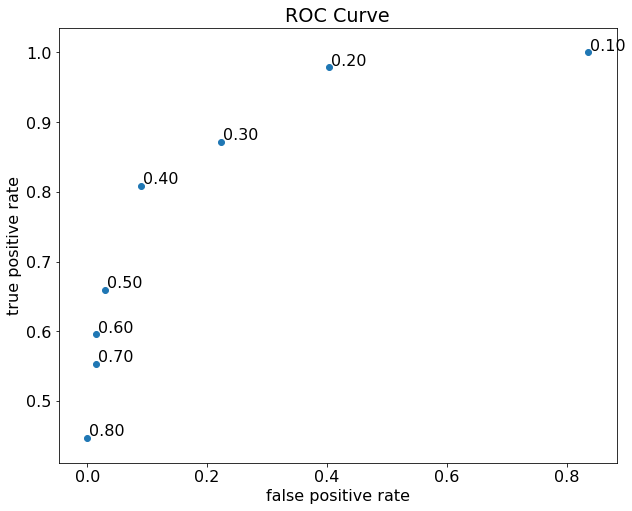

In [42]:
plt.scatter(fpr, tpr)

for thresh, fp, tp in zip(thresholds, fpr, tpr):
    plt.text(fp + 0.003, tp + 0.003, f"{thresh:0.2f}")

plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve');

We want to have a high true positive rate and a low false positive rate. If we increase the threshold then the we have a low true positive rate and a low false positive rate. If we decrease the threshold then we have a high true positive rate and a high false positive rate. So we have to trade-off between true positives and false positives.

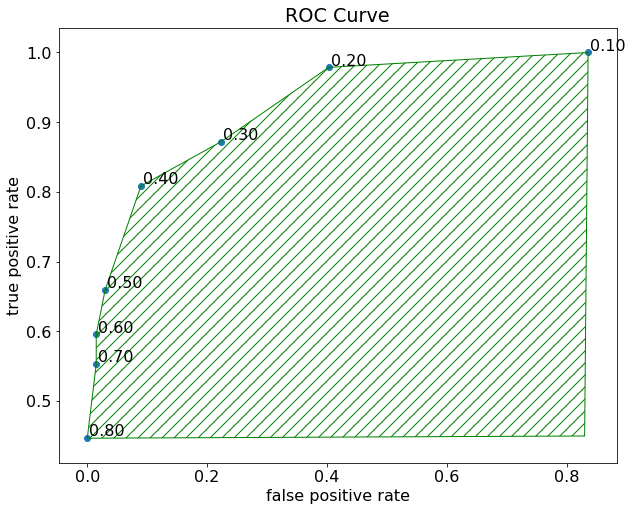

In [49]:
plt.scatter(fpr, tpr)

for thresh, fp, tp in zip(thresholds, fpr, tpr):
    plt.text(fp + 0.003, tp + 0.003, f"{thresh:0.2f}")

edges = [[fp,tp] for fp, tp in zip(fpr, tpr)]    
add_patch(plt.gca(), edges + [[0.83, 0.45]])    
    
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.title('ROC Curve');

We can summarize the ROC curve by calculating the area under the curve. We call the metric AUC. 

In [50]:
roc_auc_score(observed, yhat[:,1])

0.9244204509368052

We can use the `roc_auc_score` in the scikit-learn package to compute the AUC. Here we need the categories for each record along with the predicted probabilities. We want the value to be close to 1 indicating high true positives and low false positive rates for the thresholds.

#### Multiple Categories

We have been studying classification into two categories. We could try to study classification into multiple categories.

In [32]:
three_categories = pd.read_csv("three_categories.csv")
three_categories

,Feature 1,Feature 2,Categories
0,0.840220,1.148022,0
1,-1.154748,-1.204117,1
2,0.678636,0.724180,0
3,0.450783,-1.427097,2
4,1.492116,1.480952,0
...,...,...,...
745,0.852327,0.904248,0
746,-1.375152,-0.826757,1
747,0.267989,-1.278334,2
748,-0.886288,-0.302932,1


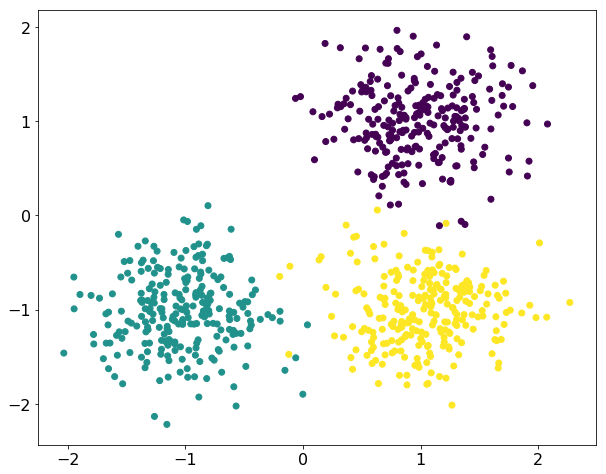

In [31]:
plt.scatter(three_categories["Feature 1"], three_categories["Feature 2"], c = three_categories["Categories"]);

We have three categories labeled 0,1,2. We can split the classification problem into three classification problems

- category 0 versus category 1 or 2
- category 1 versus category 0 or 2
- category 2 versus category 0 or 1

We need to fit three models.

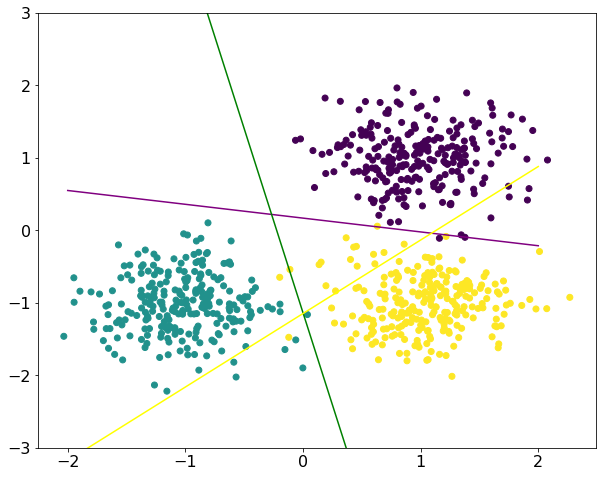

In [33]:
plot_three_categories(three_categories)

If we have a point, then we can use each model to determine a number. Remember that these number represent probabilities. We take the category corresponding to the highest probability. For example, if the probabilities we 

- Category 0 : 0.45 
- Category 1 : 0.72
- Category 2 : 0.32

then we would classify the point into category 1. 

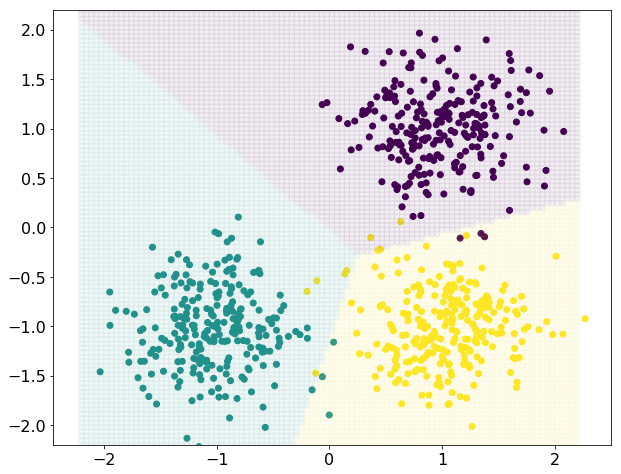

In [34]:
plot_three_categories_predictions(three_categories)

We manage to classify all points into the categories 0,1,2. Note that we have three regions corresponding to the three categories.

#### Decision Boundary

We have been studying model that separate points into two regions. The decision boundary divides the regions into category 1 and category 0. With two categories, the decision boundary has been a line.

In [35]:
def decision_boundary(data):
    sns.scatterplot('xs', 'ys', hue='pred', data=data, alpha=0.5, s=40, legend = False)
    sns.scatterplot('Feature 1', 'Feature 2', hue='Category', s=60, data=training_set, legend = False)

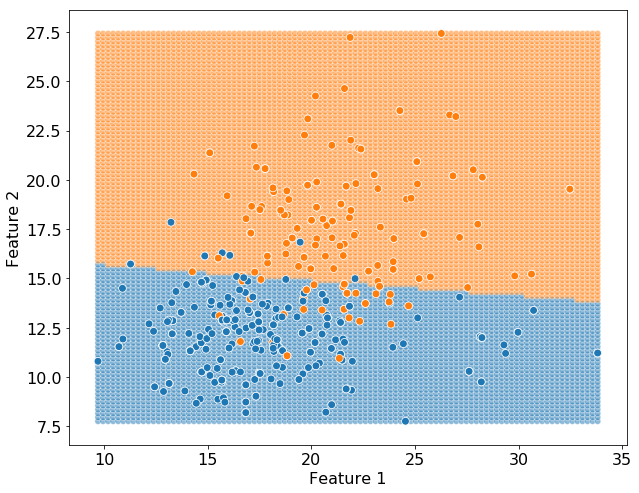

In [36]:
data = plot_decision_boundary(training_set, model)    
decision_boundary(data)

We can use transformations of the features to determine a nonlinear decision boundary.

In [37]:
training_set_polynomial = training_set.copy()

training_set_polynomial["Feature 1^2"] = training_set["Feature 1"]**2
training_set_polynomial["Feature 2^2"] = training_set["Feature 2"]**2
training_set_polynomial["Feature 1 x Feature 2"] = training_set["Feature 1"] * training_set["Feature 2"]

training_set_polynomial

,Feature 1,Feature 2,Category,Feature 1^2,Feature 2^2,Feature 1 x Feature 2
102,20.52,12.180,0,421.0704,148.352400,249.93360
435,19.62,13.980,1,384.9444,195.440400,274.28760
270,16.82,14.290,0,282.9124,204.204100,240.35780
106,18.33,11.640,0,335.9889,135.489600,213.36120
71,14.64,8.888,0,214.3296,78.996544,130.12032
...,...,...,...,...,...,...
185,15.11,10.080,0,228.3121,101.606400,152.30880
397,17.46,12.800,0,304.8516,163.840000,223.48800
222,17.53,10.180,0,307.3009,103.632400,178.45540
132,21.54,16.160,1,463.9716,261.145600,348.08640


Here we take a polynomial transformation.

In [38]:
model_polynomial = LogisticRegression()
model_polynomial.fit(training_set_polynomial.drop(columns="Category"), training_set_polynomial["Category"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

By adding features, we can determine a nonlinear decision boundary to separate the regions.

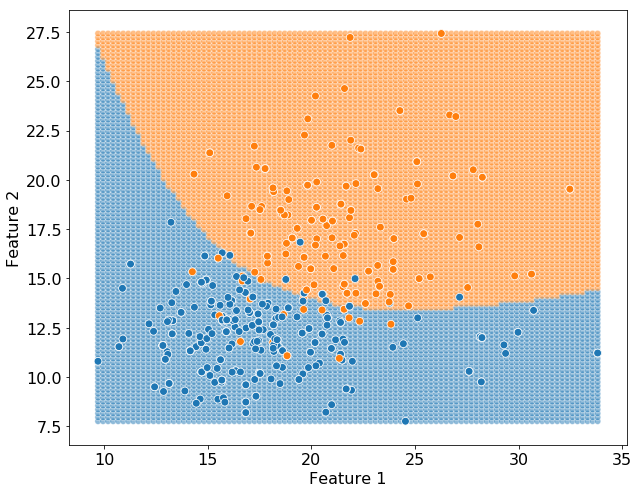

In [39]:
data = plot_decision_boundary_polynomial(training_set_polynomial, model_polynomial)    
decision_boundary(data)